# PRSmix Analysis for Predicting SAT Scores in African 

### Project Description
This project evaluates the use of PRSmix (a polygenic risk score integration method using Elastic Net) to predict a continuous trait (SAT scores) in a continental African sample. It compares PRSmix performance to that of individual PRS models from the PGS Catalog.

### Objective
- Evaluate whether integrating multiple PRS scores via PRSmix improves predictive performance in a genetically diverse population.
- Compare performance against single-PRS models.
- Provide insights on trait heritability, ancestry transferability, and modeling robustness.


The dataset is a tab-separated .txt file named satdata.txt, containing:
- **SAT**: the trait to predict (target variable).
- **PGSxxxxxx**: polygenic scores from different models.
- **sex, age**: individual-level covariates.
- **PC1–PC10**: population structure (principal components).


### To-do:
- Descriptive statistics: mean, sd
- Descriptive stats: PGS (mean, sd),  sex (, age)

## 1. Imports & Setup

- We use pandas and numpy for data handling.
- matplotlib and seaborn for visualization.
- ElasticNetCV is used for PRSmix modeling.
- LinearRegression is used to benchmark individual PGS.
- train_test_split splits the data for fair evaluation.

In [112]:
# PRSmix Analysis and Comparison with PGS Scores
# =============================================
# This notebook performs PRSmix (via Elastic Net regression) to combine multiple PGS scores
# and compares its performance to individual PGS Catalog scores on SAT prediction in African samples.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm
from scipy.stats import pearsonr

## 2. Load and Clean the Data

In [36]:
# Load the dataset (tab-separated)
#drops columns not needed for analysis.
data = pd.read_csv("satdta.txt", sep=" ")

print(data.head())

# Drop non-numeric columns not used for PRS modeling
data = data.drop(columns=['PID', 'IID'])

data.shape

   PID  SAT     PGS000109  PGS000186  PGS001238     PGS001973     PGS002191  \
0  000  215 -8.408570e-06   0.014670  -0.000107 -8.999150e-07 -8.087600e-08   
1  001  314  2.086890e-06   0.015446  -0.000009  5.632750e-07  1.082340e-07   
2  002   89 -3.065150e-07   0.015250   0.000613  5.165300e-07  5.457260e-08   
3  003  192 -1.034610e-05   0.015259  -0.000146 -9.378460e-07 -3.460850e-08   
4  004  163 -4.358090e-06   0.014781  -0.000011 -2.181880e-07 -2.629580e-09   

      PGS002343     PGS002373  PGS002415  ...       PC1       PC2       PC3  \
0 -1.076330e-06  1.651480e-07   0.006500  ... -0.002461 -0.002855  0.001409   
1 -5.009190e-07 -9.653350e-08   0.006566  ... -0.006159 -0.003920  0.001161   
2 -7.276900e-07  9.438660e-08   0.006700  ...  0.004775 -0.000314  0.002286   
3 -9.695920e-07 -1.349160e-07   0.006650  ... -0.006420 -0.003474  0.002224   
4 -7.707490e-07 -2.613450e-07   0.006525  ...  0.052691  0.017146 -0.001825   

        PC4       PC5       PC6       PC7       PC

(1624, 37)

## 3. Define Key Columns

In [33]:
# Identify PGS columns
pgs_cols = [col for col in data.columns if col.startswith("PGS")]


# Covariates and outcome
covariates = ["sex", "age"] + [f"PC{i}" for i in range(1, 11)] #Append 
outcome = "SAT"

In [31]:
#Check the columns
pgs_cols
covariates
#outcome

['sex',
 'age',
 'PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10']

## 4. Residualize SAT on Covariates
Removes the effect of age, sex, and population structure using linear regression. We work with residuals as the new target variable, isolating the genetic contribution.

In [12]:
# Residualize SAT score on covariates
X_cov = data[covariates]
y = data[outcome]

# Add intercept
X_cov = sm.add_constant(X_cov)

# Fit linear model
model_cov = sm.OLS(y, X_cov).fit()
residuals = model_cov.resid

In [13]:
residuals

0       -19.303786
1        69.747429
2      -133.928209
3       -49.077077
4         0.127288
           ...    
1619     29.993355
1620     69.778699
1621    -83.939848
1622    -45.528819
1623    -82.671795
Length: 1624, dtype: float64

## Descriptive Statistics

### 1. Univariate

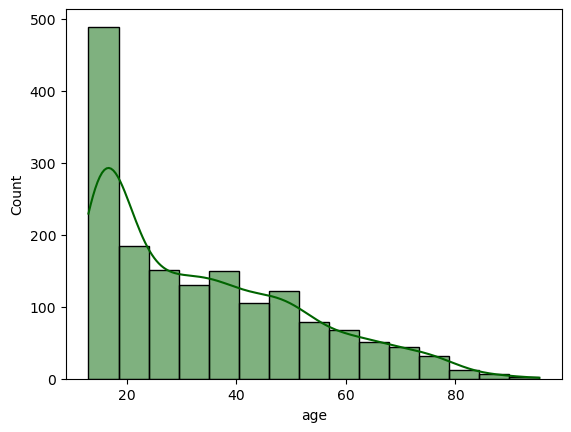

In [97]:
#Age

sns.histplot(data['age'], bins=15, kde=True, color="darkgreen")
plt.show()

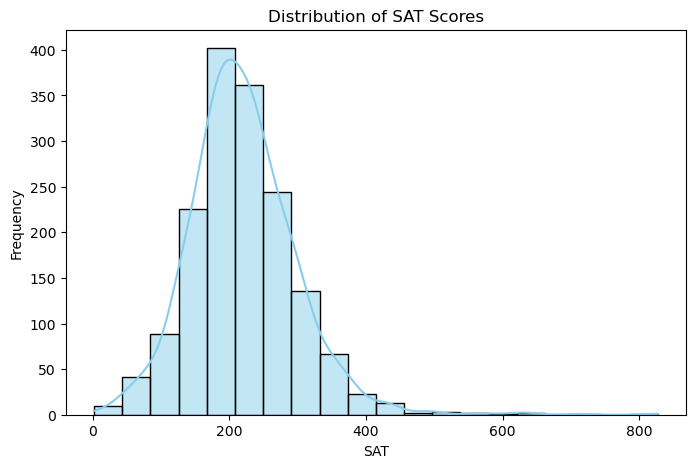

In [130]:
# Distribution of SAT (target trait)
plt.figure(figsize=(8, 5))
sns.histplot(data[outcome], bins=20, kde=True, color='skyblue')
plt.title("Distribution of SAT Scores")
plt.xlabel("SAT")
plt.ylabel("Frequency")
plt.show()

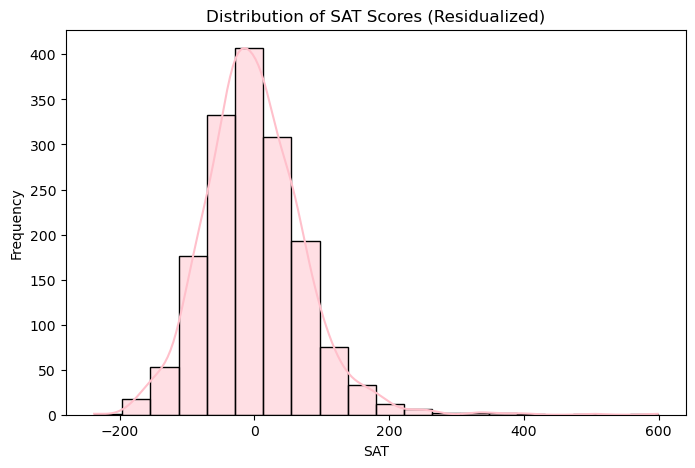

In [132]:
# Distribution of Residualized SAT (target trait)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='pink')
plt.title("Distribution of SAT Scores (Residualized)")
plt.xlabel("SAT")
plt.ylabel("Frequency")
plt.show()

/var/folders/92/w6l9jl312f1c4y3mh783v_r80000gn/T/ipykernel_5171/4059931419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=["#1f77b4", "#e377c2"])


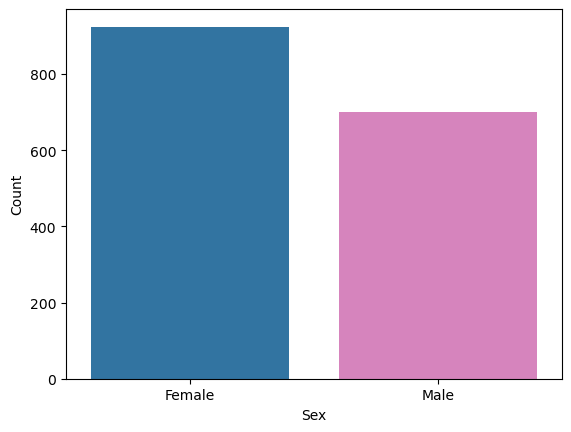

In [104]:

sex_counts = data['Sex_label'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=["#1f77b4", "#e377c2"])

plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

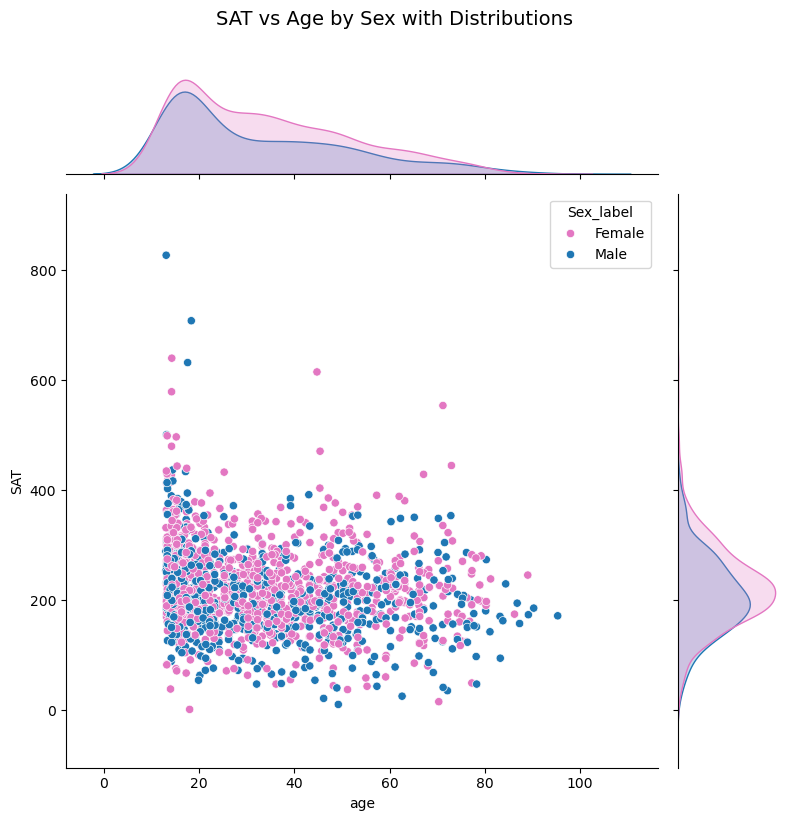

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: map sex to labels
data['Sex_label'] = data['sex'].map({1: 'Male', 2: 'Female'})  # Adjust based on your coding

#sns.reset_defaults()
plt.figure(figsize=(10, 8))
#sns.set(style="whitegrid", font_scale=1.2)

sns.jointplot(
    data=data, x="age", y="SAT", hue="Sex_label",
    kind="scatter", palette={"Male": "#1f77b4", "Female": "#e377c2"},
    height=8, marginal_kws=dict( fill=True),
)
plt.suptitle("SAT vs Age by Sex with Distributions", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
#plt.savefig("out.png") 
plt.close()

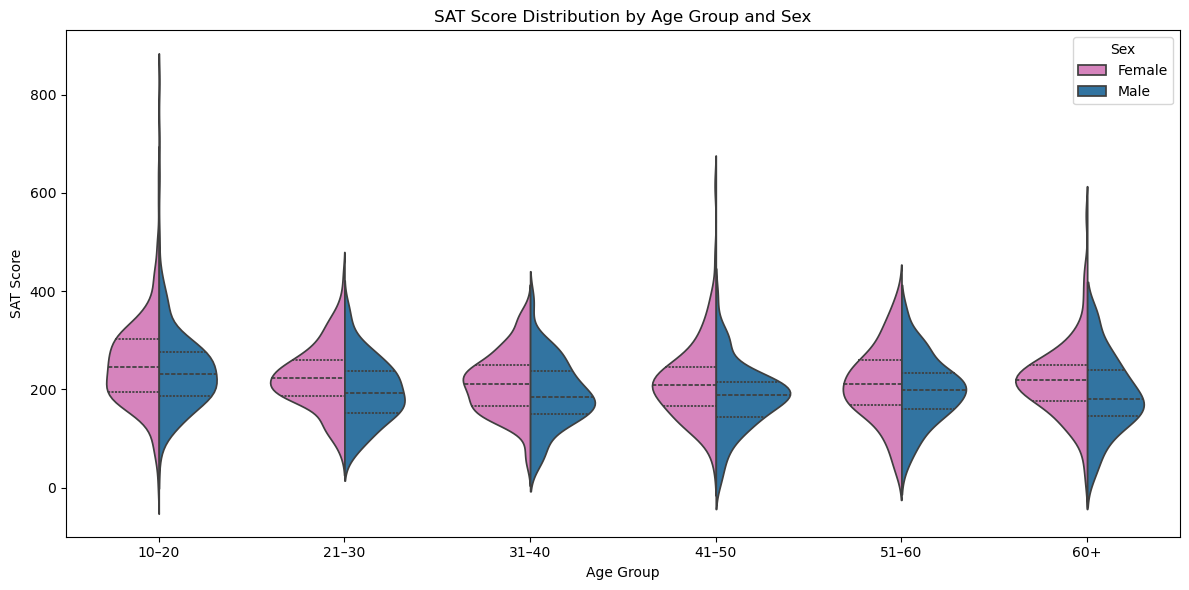

In [92]:
# Bin age into groups
data['age_group'] = pd.cut(data['age'], bins=[10, 20, 30, 40, 50, 60, 100], 
                           labels=["10–20", "21–30", "31–40", "41–50", "51–60", "60+"])

plt.figure(figsize=(12, 6))
sns.violinplot(x="age_group", y="SAT", hue="Sex_label", data=data,
               palette={"Male": "#1f77b4", "Female": "#e377c2"},
               split=True, inner="quartile")
plt.title("SAT Score Distribution by Age Group and Sex")
plt.xlabel("Age Group")
plt.ylabel("SAT Score")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

/var/folders/92/w6l9jl312f1c4y3mh783v_r80000gn/T/ipykernel_5171/533281191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pgs_long, x="PGS_ID", y="Score", palette="viridis")


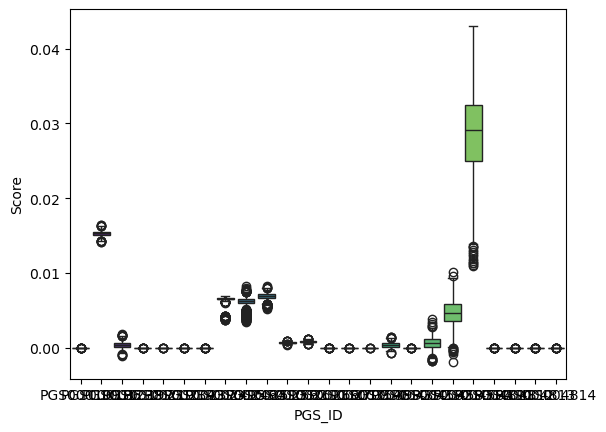

<Figure size 800x500 with 0 Axes>

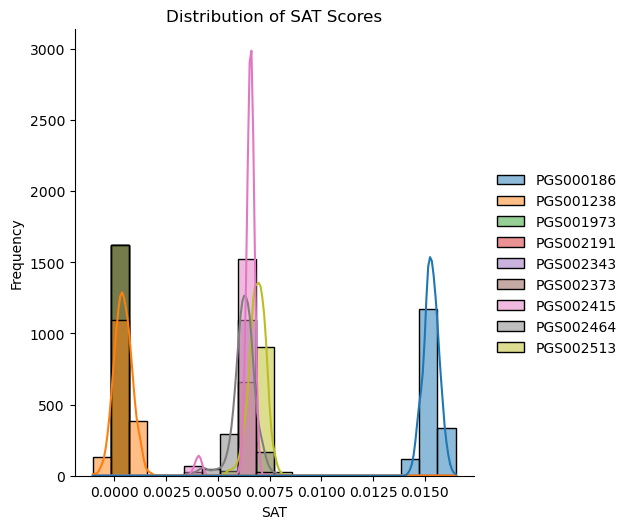

In [108]:
pgs_long = data[pgs_cols].melt(var_name="PGS_ID", value_name="Score")
sns.boxplot(data=pgs_long, x="PGS_ID", y="Score", palette="viridis")
plt.show()



# Distribution of SAT (target trait)
plt.figure(figsize=(8, 5))
sns.displot(data[pgs_cols[1:10]], bins=20, kde=True, color='skyblue')
plt.title("Distribution of SAT Scores")
plt.xlabel("SAT")
plt.ylabel("Frequency")
plt.show()

## Prepare Data for Machine Learning

In [125]:
# Prepare PRS data
X_prs = data[pgs_cols]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_prs, residuals, test_size=0.2, random_state=42)

# Fit Elastic Net
enet = ElasticNetCV(cv=5, random_state=42)
enet.fit(X_train, y_train)

# Predict on test set
y_pred = enet.predict(X_test)
prsmix_r2 = r2_score(y_test, y_pred)
prsmix_r2

-0.002858214537337478

In [123]:
#y_pred
pearsonr(y_pred,y_test)

PearsonRResult(statistic=-0.013030543324049047, pvalue=0.8149723336830252)

In [120]:
#Correlation 
# Correlation coefficient
corr_val, pvalue = pearsonr(y_test, y_pred)
corr_val

-0.013030543324049047

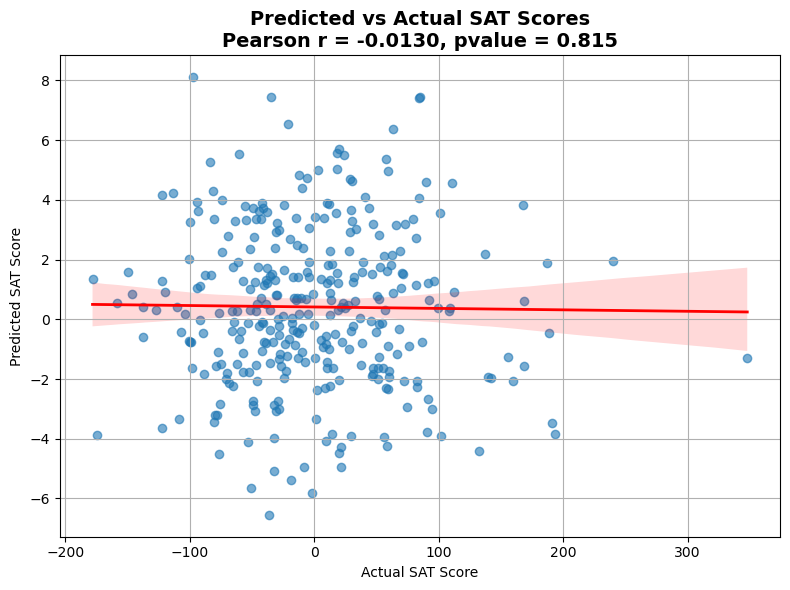

In [121]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'linewidth':2})
plt.title(f"Predicted vs Actual SAT Scores\nPearson r = {corr_val:.4f}, pvalue = {pvalue:.3f}", fontsize=14, weight='bold')
plt.xlabel("Actual SAT Score")
plt.ylabel("Predicted SAT Score")
plt.grid(True)
plt.tight_layout()
plt.show()

### Intrepretation via correlation
A correlation coefficient of -0.013 means is very close to 0: There is virtually no linear relationship between the two variables. The value is negative, but so close to zero that the direction is meaningless.

This suggests that the PRSmix model predictions are not aligned with the actual SAT scores that is **it is performing no better than random guessing**.

### What this Indicates About Model Performance
The PRSmix model is failing to predict SAT in our dataset.

**Possible causes:**
- Weak genetic signal: The SAT trait may not be strongly polygenic or heritable in this sample.
- PGS scores are mismatched: The PGS models used may have been derived from non-African populations, leading to poor transferability.
- Small sample size: With only about 1900, the model may lack power.
- Model mis-specification: Elastic Net might not have found meaningful weights if the features (PGS) are weakly informative.
- Residual confounding: If covariate adjustment was done poorly, results could be distorted.

In [126]:
# Interpretation via R-squared
prsmix_r2

-0.002858214537337478

## Interpretation of PRSmix R² = -0.00286
A negative R² means the PRSmix model performs worse than just predicting the mean of SAT for everyone. If other PGS scores have positive R², they are better than PRSmix in this case. This suggests PRSmix is overfitting or combining uninformative features.

## Compute Individual R²

In [133]:
# Compare with individual PGS R^2
single_r2s = {}
for col in pgs_cols:
    model = LinearRegression()
    model.fit(X_train[[col]], y_train)
    pred = model.predict(X_test[[col]])
    r2 = r2_score(y_test, pred)
    single_r2s[col] = r2

# Add PRSmix
single_r2s['PRSmix'] = prsmix_r2

# Visualize R2 scores
sorted_r2s = dict(sorted(single_r2s.items(), key=lambda x: x[1], reverse=True))

In [134]:
sorted_r2s

{'PGS002660': 0.05774617022721973,
 'PGS002709': 0.045664930943274396,
 'PGS002191': 0.03821955168358682,
 'PGS003546': 0.03688209199594128,
 'PGS000186': 0.035557428522486556,
 'PGS000109': 0.02939412522024054,
 'PGS003932': 0.028116477338419488,
 'PGS001238': 0.027969224491741995,
 'PGS001973': 0.02433399076752063,
 'PGS004352': 0.013064846044176792,
 'PGS004813': 0.011731984447007848,
 'PGS004811': 0.011663571763678049,
 'PGS002611': 0.010758437361817585,
 'PGS004812': 0.009791541408642468,
 'PGS004814': 0.009791541408642468,
 'PGS002562': 0.008627144576477952,
 'PGS002343': 0.006697213883553377,
 'PGS002373': 0.0013139157110695354,
 'PGS002415': -0.00020778465732695928,
 'PGS002464': -0.00036090774845032314,
 'PGS002513': -0.0007395497735795953,
 'PGS004583': -0.002176465151797924,
 'PRSmix': -0.002858214537337478,
 'PGS004584': -0.009084363223200942,
 'PGS004582': -0.011863496176467647}

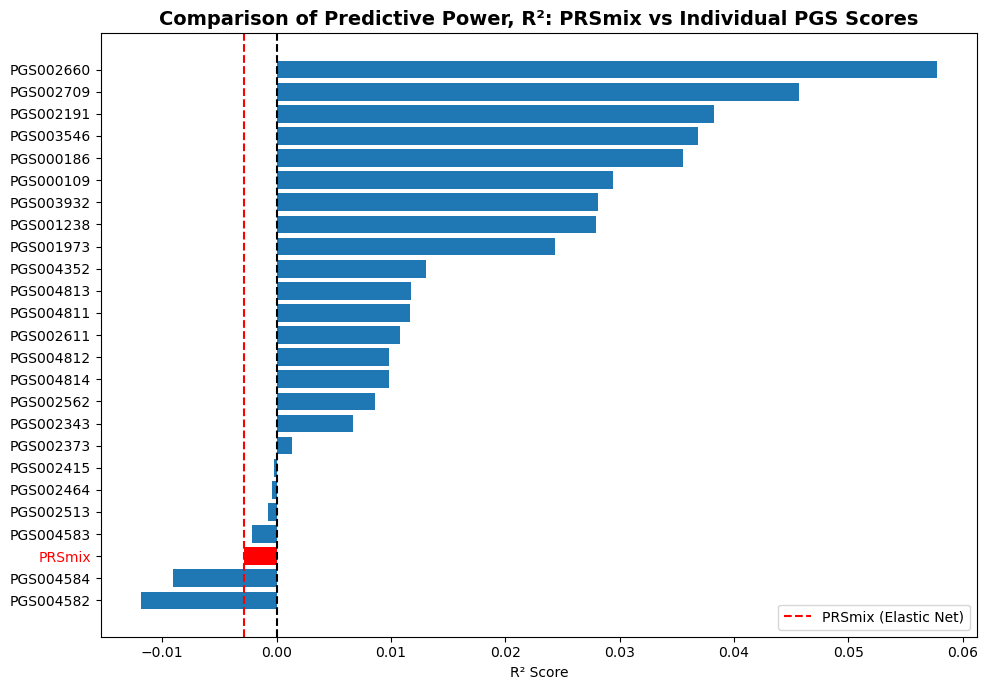

In [159]:
# Assume sorted_r2s is a dictionary: {PGS_id: R2_score}
labels = list(sorted_r2s.keys())[::-1]  # PGS IDs
scores = list(sorted_r2s.values())[::-1]

colors = ['red' if label == 'PRSmix' else '#1f77b4' for label in labels]
#colors

plt.figure(figsize=(10, 7))
plt.barh(labels, scores, color = colors)
plt.axvline(prsmix_r2, color='red', linestyle='--', label='PRSmix (Elastic Net)')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("R² Score")
plt.title("Comparison of Predictive Power, R²: PRSmix vs Individual PGS Scores", weight = "bold", fontsize=14)
plt.legend()
plt.tight_layout()

# Change label colors
ax = plt.gca()
for label in ax.get_yticklabels():
    label.set_color('red' if label.get_text() == 'PRSmix' else 'black')

plt.show()


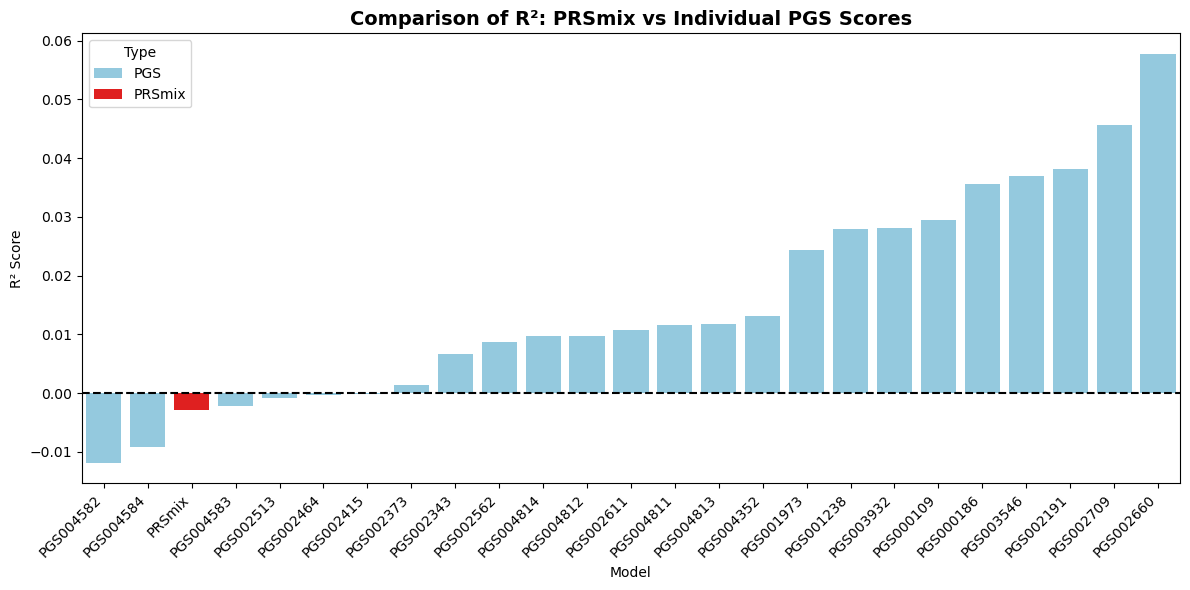

In [137]:
# Prepare DataFrame
#r2_scores = sorted_r2s
#r2_df = pd.DataFrame({
#    'Model': r2_scores.keys(),
#    'R2': r2_scores.values()
#})
#r2_df['Type'] = r2_df['Model'].apply(lambda x: 'PRSmix' if x == 'PRSmix' else 'PGS')
#r2_df = r2_df.sort_values('R2').reset_index(drop=True)

# Plot
#plt.figure(figsize=(12, 6))
#sns.barplot(data=r2_df, x='Model', y='R2', hue='Type', palette={'PRSmix': 'red', 'PGS': 'skyblue'})
#plt.axhline(0, color='black', linestyle='--')
#plt.xticks(rotation=45, ha='right')
#plt.title("Comparison of R²: PRSmix vs Individual PGS Scores", fontsize=14, weight='bold')
#plt.ylabel("R² Score")
#plt.xlabel("Model")
#plt.tight_layout()
#plt.show()

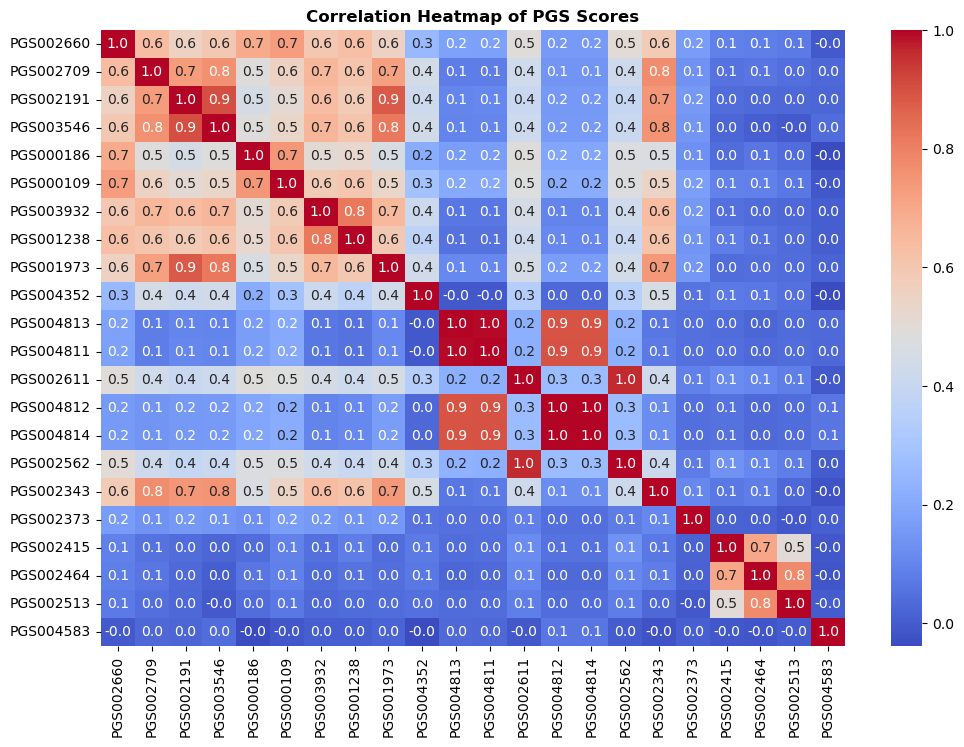

In [183]:
# Correlation heatmap of top PGS predictors
top_pgs = list(sorted_r2s.keys())[:22]
plt.figure(figsize=(12, 8))
sns.heatmap(data[top_pgs].corr(), annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Correlation Heatmap of PGS Scores", weight="bold")
plt.show()

In [171]:
len(sorted_r2s.keys())

25

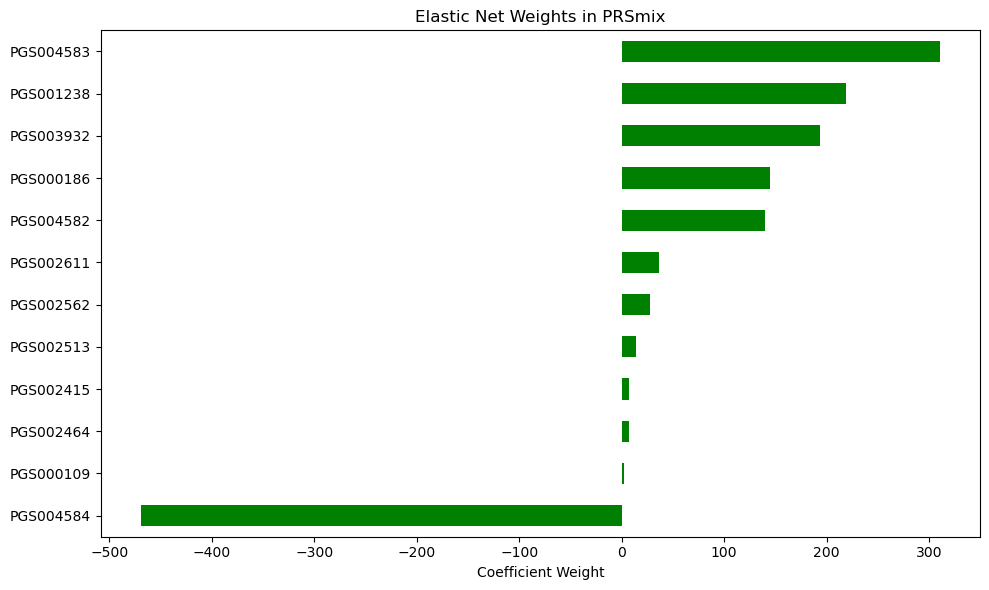

In [186]:
# PRSmix Coefficients
coefs = pd.Series(enet.coef_, index=X_prs.columns).sort_values()
coefs = coefs[coefs != 0].sort_values()
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh', color='green')
plt.title("Elastic Net Weights in PRSmix")
plt.xlabel("Coefficient Weight")
plt.tight_layout()
plt.show()

In [188]:
# : Summary Table
summary_df = pd.DataFrame({
    'PGS': list(single_r2s.keys()),
    'R2_score': list(single_r2s.values())
})

#summary_df.loc[len(summary_df.index)] = ['PRSmix', prsmix_r2]
summary_df = summary_df.sort_values(by='R2_score', ascending=False).reset_index(drop=True)
summary_df.head(10)

summary_df

,PGS,R2_score
0,PGS002660,0.057746
1,PGS002709,0.045665
2,PGS002191,0.038220
3,PGS003546,0.036882
4,PGS000186,0.035557
5,PGS000109,0.029394
6,PGS003932,0.028116
7,PGS001238,0.027969
8,PGS001973,0.024334
9,PGS004352,0.013065
